扫清数据到分析之间的障碍

写在这上面的代码越少越好

# 运行指南

# 代码

## 预处理部分
运行该部分代码，准备数据读取与分析的环境

In [ ]:
# 导入所需的包
from type_def import *

from analysis import recorder, converter, ui_tools, record_tools, visualize

import pickle
import os
import tabletext
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 指定一个路径，将在该路径下寻找所有'record-'前缀的文件
directories = 'data/analyze_cache'

filenames = ui_tools.list_files(directories, prefix='record')
print(f'在目录下找到以下记录文件\n{filenames}')
ok_filenames = record_tools.select_files(filenames, {})
print(f'符合条件的记录文件\n{ok_filenames}')

在目录下找到以下记录文件
['record.MultiCoNER']
符合条件的记录文件
['record.MultiCoNER']


In [15]:
matrix = record_tools.universal_load('data/NLP/SemEval/MultiCoNER/training_data/MIX_Code_mixed/mix_train.conll')
m, k = record_tools.flatten_data_array_of_dict(matrix['conll_samples']['value'])
tags, chars = m[1], m[2]
from work.NER import NER_utils

def analyze_func(tag):
    l = len(tag.data)
    span_dict = NER_utils.BIO_to_spandict(tag.data)
    tag_cnt = sum(list(len(v) for v in span_dict.values()))
    tag_len_cnt = sum(list(sum(list(x[1] - x[0] for x in v)) for v in span_dict.values()))
    return list(record_tools.RecordDataWrap(x) for x in [l, tag_cnt, tag_len_cnt])

new_arrays = record_tools.generate_data_array_from_old(tags, analyze_func)
new_arrays

(1500, 3)
(1500,)


[array([6, 24, 8, ..., 5, 9, 3], dtype=object),
 array([1, 4, 1, ..., 1, 1, 1], dtype=object),
 array([3, 9, 2, ..., 2, 5, 1], dtype=object)]

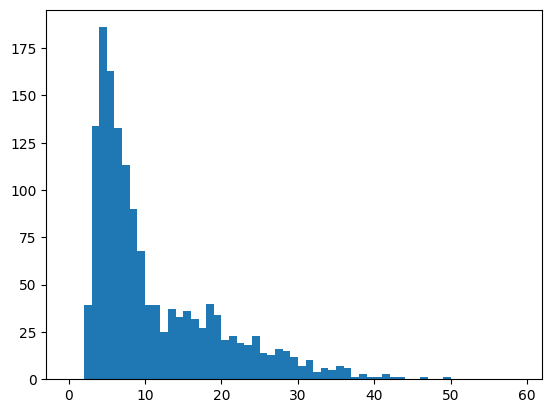

In [12]:
visualize.plot_value_distribution_1d(record_tools.release_RecordDataWrap(new_arrays[0]))

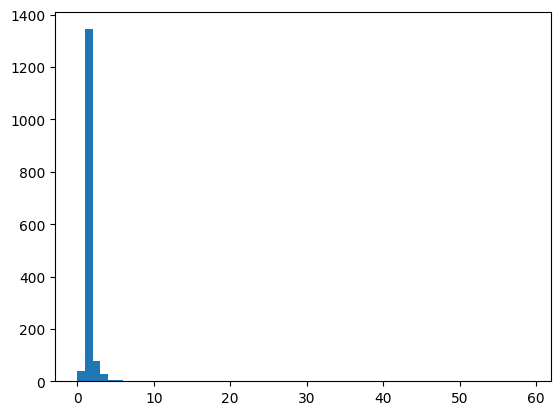

In [13]:
visualize.plot_value_distribution_1d(record_tools.release_RecordDataWrap(new_arrays[1]))

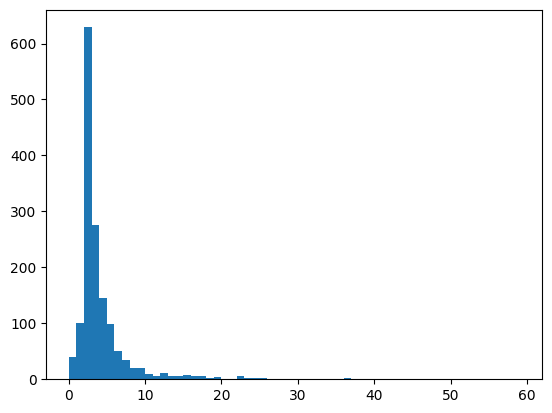

In [14]:
visualize.plot_value_distribution_1d(record_tools.release_RecordDataWrap(new_arrays[2]))

In [3]:
matrix_dict = {}
for elem_file in filenames:
    try:
        filepath = os.path.join(directories, elem_file)
        d = converter.read_record(filepath)
        matrix_dict.update(d)
    except Exception as e:
        print(e.with_traceback())
        print(f'[Record]Failed parsing record file [{elem_file}], reason:[{e}]!')

print('[Record]从record文件中读取到下列数据:')
tableprint = [['matrix name', 'matrix shape', 'matrix dimension', 'data type']]
for key, value in matrix_dict.items():
    matrix_shape = str(value['value'].shape)
    matrix_dimension = str(list(list(x.keys())[0] if isinstance(x, dict) else x for x in value['dimension'][:-1]))
    data_type = value['dimension'][-1]
    tableprint.append([key, matrix_shape, matrix_dimension, data_type])
print(tabletext.to_text(tableprint))

[Record]从record文件中读取到下列数据:
┌─────────────┬──────────────┬──────────────────┬────────────┐
│ matrix name │ matrix shape │ matrix dimension │ data type  │
├─────────────┼──────────────┼──────────────────┼────────────┤
│ ner_samples │ (1500,)      │ ['samples']      │ ner_sample │
└─────────────┴──────────────┴──────────────────┴────────────┘


In [4]:
def get_data(name):
    return matrix_dict[name]['value']

## 几个用例

### 打印label类型数据
label类型数据是label的list

In [24]:

def print_label_as_table(strlst):
    tableprint = [strlst]
    print(tabletext.to_text(tableprint))

def print_label_as_table_compare(strlst1, strlst2):
    tableprint = [strlst1, strlst2]
    print(tabletext.to_text(tableprint))

print_label_as_table(matrix_dict['ner_pred_lst']['value'][-1][100].data)
print()
print_label_as_table_compare(matrix_dict['ner_pred_lst']['value'][-1][100].data[1:-1], matrix_dict['ner_gt_lst']['value'][-1][100].data)

┌───┬───┬───┬───┬───┬───┬───┬───┬────────────────┬────────────────┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┐
│ O │ O │ O │ O │ O │ O │ O │ O │ B-COMMENTS_ADJ │ I-COMMENTS_ADJ │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │
└───┴───┴───┴───┴───┴───┴───┴───┴────────────────┴────────────────┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┘

┌───┬───┬───┬───┬───┬───┬───┬────────────────┬────────────────┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┐
│ O │ O │ O │ O │ O │ O │ O │ B-COMMENTS_ADJ │ I-COMMENTS_ADJ │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │
├───┼───┼───┼───┼───┼───┼───┼────────────────┼────────────────┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ O │ O │ O │ O │ O │ O │ O │ B-COMMENTS_ADJ │ I-COMMENTS_ADJ │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │ O │
└───┴───┴───┴───┴───┴───┴───┴────────────────┴────────────────┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴

In [30]:
get_data('ner_result')[0][0].data.shape

(68, 9)

### 对tensor进行可视化
需要考虑一维、二维、三维以及对比的情况
还要考虑相关性分析，复合图（比如折线图加相关性图）

In [43]:
def plot_2d_tensor(tensor_2d):
    plt.matshow(tensor_2d);
    plt.colorbar()
    plt.show()

def sigmoid_function(z):
    """ this function implements the sigmoid function, and 
    expects a numpy array as argument """
    
    if isinstance(z, np.ndarray):
        pass
    
    sigmoid = 1.0/(1.0 + np.exp(-z))
    return sigmoid 

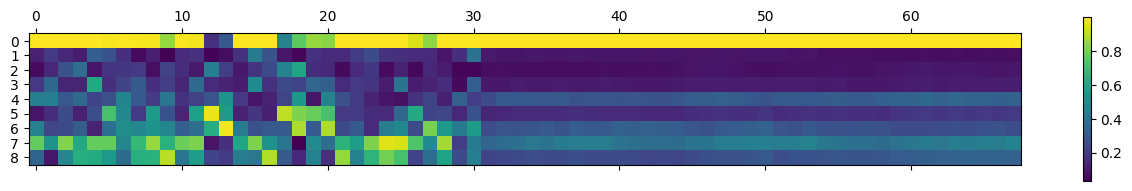

In [44]:
plot_2d_tensor(sigmoid_function(get_data('ner_result')[0][0].data.T))

可以寻找更好的绘图工具

### 趋势图绘制
一般用于一维数据的时间走势。多个一维数据的时间走势

(28, 3)


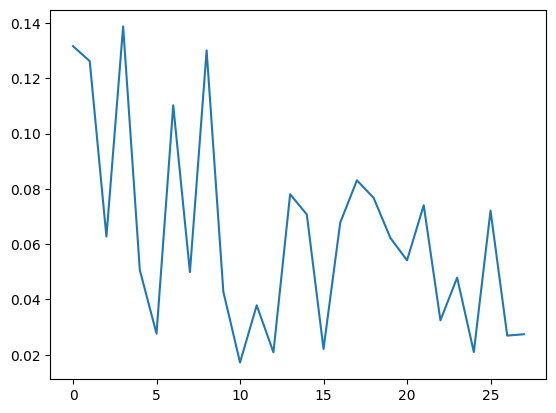

In [76]:
l = get_data('loss')
l = converter.release_RecordDataWrap(l)
print(l.shape)
plt.plot(l.T[0])
plt.show()

### 尝试transformer的Positional Encoding

(1024, 64)


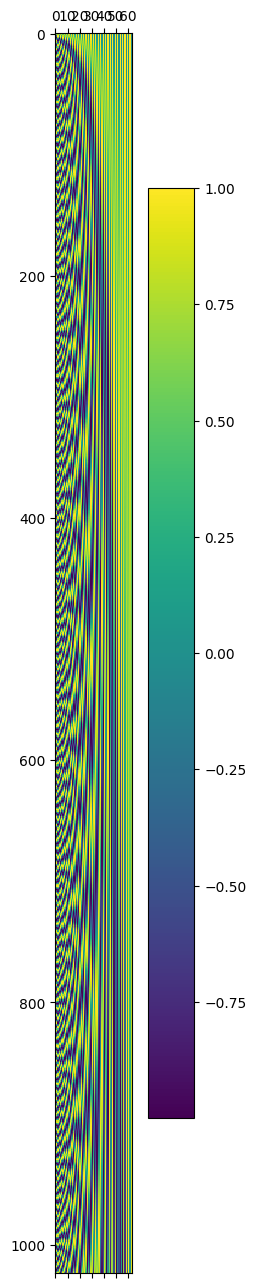

In [107]:
def generate_positional_encoding(seql=128,d=64):
    inv_seq = 1 / (1000 ** (np.arange(0.0, d, 2.0) / d))  # (d)
    
    seq = np.arange(seql)  # (seql)
    
    sin_seq = np.outer(seq, inv_seq)  # (seql, d)
    cos_seq = np.outer(seq, inv_seq)  # (seql, d)
    combined_seq = np.stack([np.sin(sin_seq), np.cos(cos_seq)], axis=-1)  # (seql, d, 2)
    result_seq = combined_seq.reshape([seql, -1])
    
    return result_seq

r = generate_positional_encoding(1024, 64)
print(r.shape)
plot_2d_tensor(r)
    

(1024, 64)


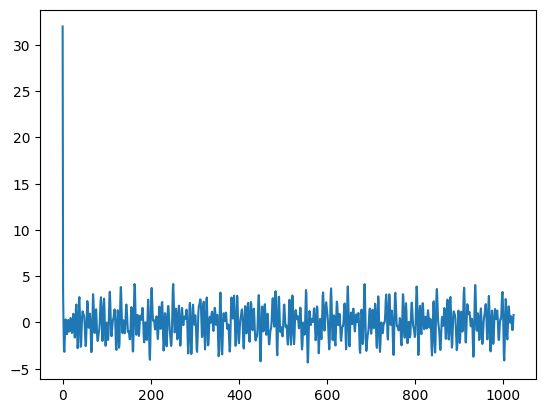

In [108]:
# 不同位置向量之间的差
r2 = r.copy()
pad_zero = np.zeros(r.shape[1])
pad_zero = np.expand_dims(pad_zero, axis=0)  # (1, d)
r2 = np.concatenate([pad_zero, r2], axis=0)  # (seql + 1, d)
r2 = r2[:-1, :]  # (seql, d)
print(r2.shape)

dif = r - r2
dif_sum = np.sum(dif, axis=-1)
plt.plot(dif_sum)
plt.show()

# 工作区
乱七八糟的尝试代码写在这里

In [1]:
import pickle
import pandas as pd

data_path = 'temp_data/PLMEE_Trigger.averaged_loss.fixed-EvalResults.pk'

data = pickle.load(open(data_path, 'rb'))
gt = data['gts'][0]
preds = data['preds']

In [35]:
pred_frame = pd.DataFrame(preds[-1])
pred_results = list(set(x) for x in pred_frame['results'].tolist())
gts = list(set(x) for x in gt)
pred_frame['results'] = pred_results
pred_frame['gts'] = gts

# 计算三个数
pred_frame['total'] = pred_frame['gts'].str.len()
pred_frame['predict'] = pred_frame['results'].str.len()
pred_frame['correct'] = pred_frame.apply(lambda x: len(x.results.intersection(x.gts)), axis=1)

# 计算precision和recall
pred_frame['precision'] = pred_frame.apply(lambda x: x.correct / x.predict if x.predict != 0 else 0, axis=1)
pred_frame['recall'] = pred_frame.apply(lambda x: x.correct / x.total if x.total != 0 else 0, axis=1)
pred_frame['f1'] = pred_frame.apply(lambda x: (2 * x.recall * x.precision) / (x.recall + x.precision) if x.recall + x.precision != 0 else 0, axis=1)

In [36]:
pred_frame.keys()

Index(['results', 'detailed', 'sentence', 'offset_mapping', 'gts', 'total',
       'predict', 'correct', 'precision', 'recall', 'f1'],
      dtype='object')

In [46]:
pred_frame.sort_values(by='f1')[['results', 'gts', 'f1', 'sentence']][10:20]


,results,gts,f1,sentence
209,{},{产品行为-发布:发布},0.0,小米昨天刚刚官宣 5G 新机三证齐全，已经做好了随时商用准备。今天，师出同门的红米 Redm...
530,{},{交往-道歉:道歉},0.0,2019年7月28日，和周立波对骂数月的黄毅清更新了动态，动态中是一封手写的道歉信，上面歪歪...
529,{交往-道歉:道歉取得谅解},{交往-道歉:道歉},0.0,石家庄栾城五中校园欺凌事件最新通报：打人女生向被打女生赔礼道歉取得谅解
1313,{竞赛行为-胜负:首胜},{竞赛行为-胜负:力克},0.0,中超第15轮强强对话，鲁能主场2比0力克国安，取得近4轮首胜。
1068,{},{灾害/意外-车祸:撞到},0.0,10月12日，在济青高速青岛方向，一大货车撞到路边护栏，司机被困车内，意识模糊，消防员紧急救助。
215,{财经/交易-出售/收购:发售},{产品行为-发布:发售},0.0,9月18日，成都商报-红星新闻记者从某经销商处获知，iPhone新款手机已经到店，但由于苹果...
1311,{},{竞赛行为-胜负:4-0},0.0,国乒世界冠军4-0暴击日本选手，对方被打崩盘，垂头丧气信心全无
1069,{},{灾害/意外-车祸:闯进},0.0,10月20日，河北唐山迁西滦阳镇三岔路口，一辆大货车闯进路旁商店，现场一片狼藉。司机被困车内...
234,{},{产品行为-发布:发布会},0.0,自媒体时代首部微信随笔集《行走的树》，今天在长沙与读者见面。发布会现场，该书作者、吉首大学原...
1076,{},{灾害/意外-车祸:撞到},0.0,合肥市政务区习友路在怀宁路和潜山路之间西向东路段，今天上午8:20分，一女子突然横穿马路，被...


In [42]:
pred_frame[['detailed']][846:]

,detailed
846,"{'组织关系-停职': [{'word': '停职 当地正调查', 'token_span'..."
847,"{'组织关系-停职': [{'word': '停职', 'token_span': (13,..."
848,"{'组织关系-停职': [{'word': '停职', 'token_span': (107..."
849,"{'组织关系-停职': [{'word': '停职', 'token_span': (21,..."
850,"{'组织关系-停职': [{'word': '停职', 'token_span': (32,..."
...,...
1481,"{'灾害/意外-地震': [{'word': '地震', 'token_span': (15..."
1482,"{'灾害/意外-地震': [{'word': '地震', 'token_span': (21..."
1483,"{'灾害/意外-地震': [{'word': '地震', 'token_span': (63..."
1484,"{'人生-死亡': [{'word': '死', 'token_span': (35, 36..."


In [44]:
preds[-1][846]

{'results': ['组织关系-停职:停职 当地正调查'],
 'detailed': {'组织关系-停职': [{'word': '停职 当地正调查', 'token_span': (16, 23)}]},
 'sentence': '青岛遭妻子曝光收礼涉事医生已被停职 当地正调查',
 'offset_mapping': [(0, 0),
  (0, 1),
  (1, 2),
  (2, 3),
  (3, 4),
  (4, 5),
  (5, 6),
  (6, 7),
  (7, 8),
  (8, 9),
  (9, 10),
  (10, 11),
  (11, 12),
  (12, 13),
  (13, 14),
  (14, 15),
  (15, 16),
  (16, 17),
  (18, 19),
  (19, 20),
  (20, 21),
  (21, 22),
  (22, 23),
  (0, 0)]}

In [54]:
import pandas as pd
d3 = pd.read_pickle('dual_training.train_records.pk')


<AxesSubplot:>

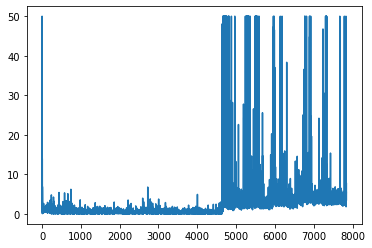

In [51]:
# loss = d3[d3['loss'] < 50]['loss']
# d3[d3['loss'] < 50]['loss'] = 50
loss = d3['loss']
loss = loss.clip(lower=0, upper=50)
loss.plot()

<AxesSubplot:>

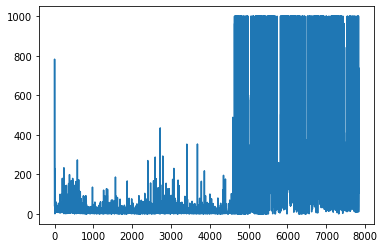

In [57]:
norm = d3['norm']
norm = norm.clip(0, 1000)
norm.plot()

<AxesSubplot:>

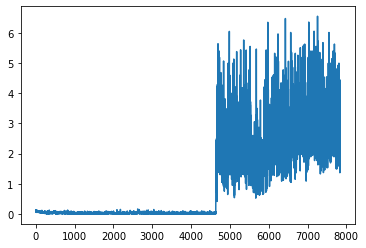

In [20]:
T_loss = d3['T_loss']
T_loss.plot()

<AxesSubplot:>

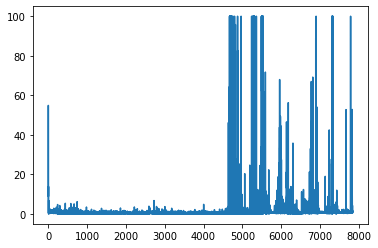

In [58]:
TWord_loss = d3['TWord_loss']
TWord_loss = TWord_loss.clip(lower=0, upper=100)
TWord_loss.plot()